In [ ]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()


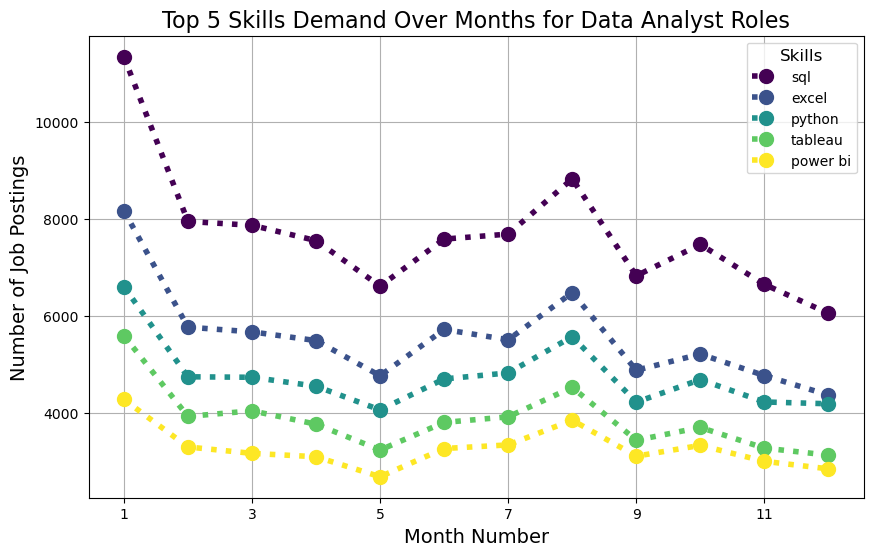

In [12]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size',fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot.drop('Total', inplace=True)
df_DA_pivot.iloc[:, :5].plot(kind='line',
    linewidth=4,
    linestyle=':',
    colormap='viridis',
    marker='o',
    markersize=10,
    figsize=(10,6))

plt.title('Top 5 Skills Demand Over Months for Data Analyst Roles', fontsize=16)
plt.xlabel('Month Number', fontsize=14)
plt.ylabel('Number of Job Postings', fontsize=14)
plt.legend(title='Skills', title_fontsize=12, fontsize=10)
plt.grid(True)
plt.show()

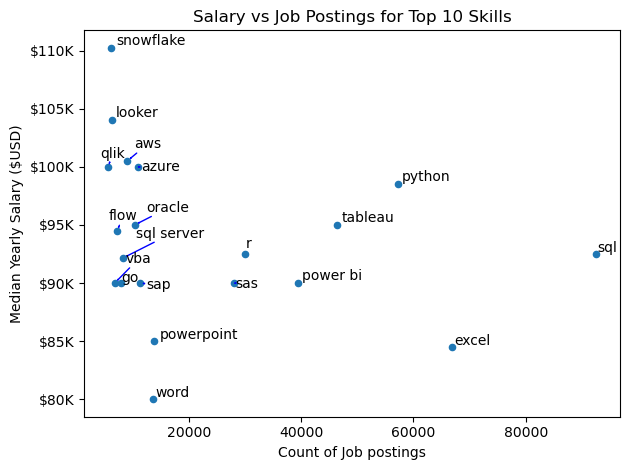

In [17]:
from adjustText import adjust_text
df =df[df['job_title_short'] == 'Data Analyst']
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg (skill_count = ('job_skills', 'count'), median_salary = ('salary_year_avg', 'median') )

skills_count = 20
skills_stats = skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skills_count)
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title("Salary vs Job Postings for Top 10 Skills")
plt.xlabel("Count of Job postings")
plt.ylabel("Median Yearly Salary ($USD)")

texts = []
for i, txt in enumerate(skills_stats.index):
    texts.append (plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='blue', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.tight_layout()
plt.show()